# 0 Libraries import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Data loading and preprocessing

In [2]:
data = pd.read_csv('risk_factors_cervical_cancer.csv')

In [3]:
data.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


Let's count the number of missing values in each column ("?" sign stands for missing value here) and print columns where the majority of data is missing:

In [4]:
for name in data.columns:
    print(name+": ",len(data[name][data[name]=="?"]))
print("\n Seriously missing values")
for name in data.columns:
    a = int(len(data[name][data[name]=="?"])/len(data)*100)
    if a > 50:
        print(name+" (relative count percentage): ",int(len(data[name][data[name]=="?"])/len(data)*100),"%")

Age:  0
Number of sexual partners:  26
First sexual intercourse:  7
Num of pregnancies:  56
Smokes:  13
Smokes (years):  13
Smokes (packs/year):  13
Hormonal Contraceptives:  108
Hormonal Contraceptives (years):  108
IUD:  117
IUD (years):  117
STDs:  105
STDs (number):  105
STDs:condylomatosis:  105
STDs:cervical condylomatosis:  105
STDs:vaginal condylomatosis:  105
STDs:vulvo-perineal condylomatosis:  105
STDs:syphilis:  105
STDs:pelvic inflammatory disease:  105
STDs:genital herpes:  105
STDs:molluscum contagiosum:  105
STDs:AIDS:  105
STDs:HIV:  105
STDs:Hepatitis B:  105
STDs:HPV:  105
STDs: Number of diagnosis:  0
STDs: Time since first diagnosis:  787
STDs: Time since last diagnosis:  787
Dx:Cancer:  0
Dx:CIN:  0
Dx:HPV:  0
Dx:  0
Hinselmann:  0
Schiller:  0
Citology:  0
Biopsy:  0

 Seriously missing values
STDs: Time since first diagnosis (relative count percentage):  91 %
STDs: Time since last diagnosis (relative count percentage):  91 %


/Users/egor/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


**Description**

We have found out that majority of columns has missing values, and each of those columns has approx. 10% of values missing. However there are two columns which miss almost 91% of data (last two columns above). I think it will be reasonable to drop these columns before training at least linear models (to avoid linear dependency and degeneracy of matrix of features-objects)

We can also see that all data in our dataset is either numerical or bool type, so we don't have any categorical features [(see description here for more details)](http://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#).

**Fill NAs**

I will fill the data with median in case of int (float) values and with median in case of bool values (because mode is equivalent to median in this case).

In [5]:
i = 0
for name in data.columns:
    #print(i)
    q = np.unique(data[name])
    q = q[q!='?']
    median = np.median(q.astype(np.float))
    data[name] = data[name].replace("?", median)
    #print(q.astype(np.float))
    #print()
    i+=1

/Users/egor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


Here we'll inspect columns for number of missing values just for checking:

In [6]:
for name in data.columns:
    print(name+": ",len(data[name][data[name]=="?"]))
print("\n Seriously missing values")
for name in data.columns:
    a = int(len(data[name][data[name]=="?"])/len(data)*100)
    if a > 50:
        print(name+" (relative count percentage): ",int(len(data[name][data[name]=="?"])/len(data)*100),"%")

Age:  0
Number of sexual partners:  0
First sexual intercourse:  0
Num of pregnancies:  0
Smokes:  0
Smokes (years):  0
Smokes (packs/year):  0
Hormonal Contraceptives:  0
Hormonal Contraceptives (years):  0
IUD:  0
IUD (years):  0
STDs:  0
STDs (number):  0
STDs:condylomatosis:  0
STDs:cervical condylomatosis:  0
STDs:vaginal condylomatosis:  0
STDs:vulvo-perineal condylomatosis:  0
STDs:syphilis:  0
STDs:pelvic inflammatory disease:  0
STDs:genital herpes:  0
STDs:molluscum contagiosum:  0
STDs:AIDS:  0
STDs:HIV:  0
STDs:Hepatitis B:  0
STDs:HPV:  0
STDs: Number of diagnosis:  0
STDs: Time since first diagnosis:  0
STDs: Time since last diagnosis:  0
Dx:Cancer:  0
Dx:CIN:  0
Dx:HPV:  0
Dx:  0
Hinselmann:  0
Schiller:  0
Citology:  0
Biopsy:  0

 Seriously missing values


**Now** all missing values are filled!

# 2 Exploratory analysis

In [7]:
data = data.astype(float)
data.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.070030,0.372193,0.470746,0.051850,0.199094,0.128134,0.079147,0.255854,0.199036,...,0.083151,0.097040,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.070030,1.000000,-0.140855,0.061035,0.209390,0.161537,0.154896,-0.006823,0.018823,0.040353,...,-0.011674,-0.006550,0.010690,0.007518,0.015266,0.009736,-0.037073,-0.019751,0.004422,-0.008411
First sexual intercourse,0.372193,-0.140855,1.000000,-0.073055,-0.122688,-0.056036,-0.054917,0.029417,-0.010093,-0.053344,...,0.019091,0.025111,0.065689,-0.033375,0.042481,0.034100,-0.018272,0.000791,-0.012953,0.004940
Num of pregnancies,0.470746,0.061035,-0.073055,1.000000,0.071950,0.136691,0.089298,0.133157,0.160107,0.162940,...,0.038746,0.049587,0.014877,0.095232,0.025357,0.059748,0.042261,0.094832,-0.044086,0.067649
Smokes,0.051850,0.209390,-0.122688,0.071950,1.000000,0.721859,0.498533,-0.010987,0.045516,-0.029331,...,-0.031396,-0.040684,-0.004999,-0.044066,0.018062,-0.062582,0.037047,0.056874,-0.002113,0.029668
Smokes (years),0.199094,0.161537,-0.056036,0.136691,0.721859,1.000000,0.715056,-0.025231,0.042585,0.037014,...,0.003839,-0.021102,0.066549,-0.033358,0.068976,-0.035814,0.074746,0.099239,-0.002183,0.060653
Smokes (packs/year),0.128134,0.154896,-0.054917,0.089298,0.498533,0.715056,1.000000,0.002769,0.036677,0.008810,...,0.015783,0.008644,0.112316,-0.022168,0.114198,-0.029989,0.028552,0.020512,0.005864,0.025133
Hormonal Contraceptives,0.079147,-0.006823,0.029417,0.133157,-0.010987,-0.025231,0.002769,1.000000,0.427276,-0.007881,...,0.038298,0.053267,0.032040,-0.002839,0.041059,0.000548,0.041506,0.007899,-0.005109,0.017996
Hormonal Contraceptives (years),0.255854,0.018823,-0.010093,0.160107,0.045516,0.042585,0.036677,0.427276,1.000000,0.146397,...,0.077387,0.086008,0.046345,0.002416,0.056465,-0.015774,0.027530,0.061675,0.065735,0.064370
IUD,0.199036,0.040353,-0.053344,0.162940,-0.029331,0.037014,0.008810,-0.007881,0.146397,1.000000,...,0.038314,0.045216,0.076584,0.071634,0.038689,0.132662,0.013322,0.036060,-0.012416,0.021130


**We see that we have columns with NaN correlation with all other features**. That's because they consist only of zeros (intially there were zeros and "?"). So I will drop them as they can't bring any new information!

In [8]:
data = data.drop('STDs:cervical condylomatosis',axis = 1)
data = data.drop("STDs:AIDS",axis=1)

In [9]:
data.corr()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,0.070030,0.372193,0.470746,0.051850,0.199094,0.128134,0.079147,0.255854,0.199036,...,0.083151,0.097040,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
Number of sexual partners,0.070030,1.000000,-0.140855,0.061035,0.209390,0.161537,0.154896,-0.006823,0.018823,0.040353,...,-0.011674,-0.006550,0.010690,0.007518,0.015266,0.009736,-0.037073,-0.019751,0.004422,-0.008411
First sexual intercourse,0.372193,-0.140855,1.000000,-0.073055,-0.122688,-0.056036,-0.054917,0.029417,-0.010093,-0.053344,...,0.019091,0.025111,0.065689,-0.033375,0.042481,0.034100,-0.018272,0.000791,-0.012953,0.004940
Num of pregnancies,0.470746,0.061035,-0.073055,1.000000,0.071950,0.136691,0.089298,0.133157,0.160107,0.162940,...,0.038746,0.049587,0.014877,0.095232,0.025357,0.059748,0.042261,0.094832,-0.044086,0.067649
Smokes,0.051850,0.209390,-0.122688,0.071950,1.000000,0.721859,0.498533,-0.010987,0.045516,-0.029331,...,-0.031396,-0.040684,-0.004999,-0.044066,0.018062,-0.062582,0.037047,0.056874,-0.002113,0.029668
Smokes (years),0.199094,0.161537,-0.056036,0.136691,0.721859,1.000000,0.715056,-0.025231,0.042585,0.037014,...,0.003839,-0.021102,0.066549,-0.033358,0.068976,-0.035814,0.074746,0.099239,-0.002183,0.060653
Smokes (packs/year),0.128134,0.154896,-0.054917,0.089298,0.498533,0.715056,1.000000,0.002769,0.036677,0.008810,...,0.015783,0.008644,0.112316,-0.022168,0.114198,-0.029989,0.028552,0.020512,0.005864,0.025133
Hormonal Contraceptives,0.079147,-0.006823,0.029417,0.133157,-0.010987,-0.025231,0.002769,1.000000,0.427276,-0.007881,...,0.038298,0.053267,0.032040,-0.002839,0.041059,0.000548,0.041506,0.007899,-0.005109,0.017996
Hormonal Contraceptives (years),0.255854,0.018823,-0.010093,0.160107,0.045516,0.042585,0.036677,0.427276,1.000000,0.146397,...,0.077387,0.086008,0.046345,0.002416,0.056465,-0.015774,0.027530,0.061675,0.065735,0.064370
IUD,0.199036,0.040353,-0.053344,0.162940,-0.029331,0.037014,0.008810,-0.007881,0.146397,1.000000,...,0.038314,0.045216,0.076584,0.071634,0.038689,0.132662,0.013322,0.036060,-0.012416,0.021130


Now let's try to formulate hypotheses:
 - cancer appearance as a target value may be severely imbalanced - `sns.catplot` will help us with that;
 - cancer appearance may depend on age - `sns.lineplot` will help us;
 - cancer appearance may depend on the number of multiple STD daignoses.

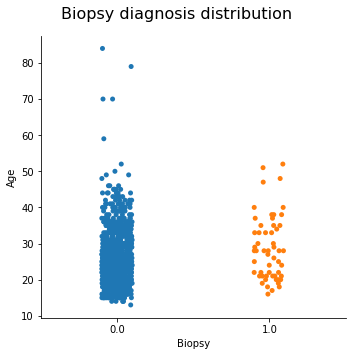

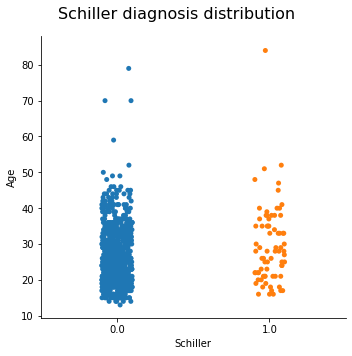

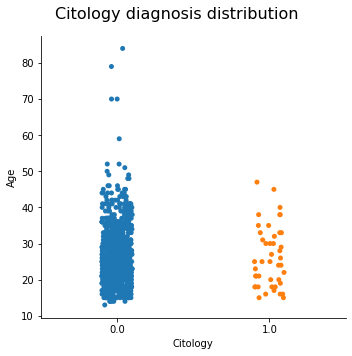

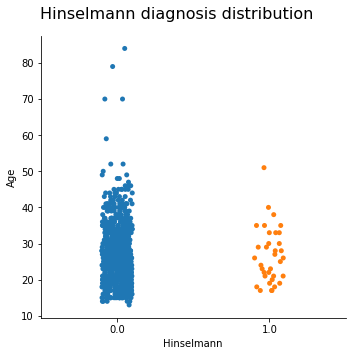

In [10]:
g = sns.catplot(x = 'Biopsy',y='Age',hue = 'Biopsy',data=data)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Biopsy diagnosis distribution', fontsize=16)
plt.show()

g = sns.catplot(x = 'Schiller',y='Age',hue = 'Schiller',data=data)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Schiller diagnosis distribution', fontsize=16)
plt.show()

g = sns.catplot(x = 'Citology',y='Age',hue = 'Citology',data=data)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Citology diagnosis distribution', fontsize=16)
plt.show()

g = sns.catplot(x = 'Hinselmann',y='Age',hue = 'Hinselmann',data=data)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Hinselmann diagnosis distribution', fontsize=16)
plt.show()

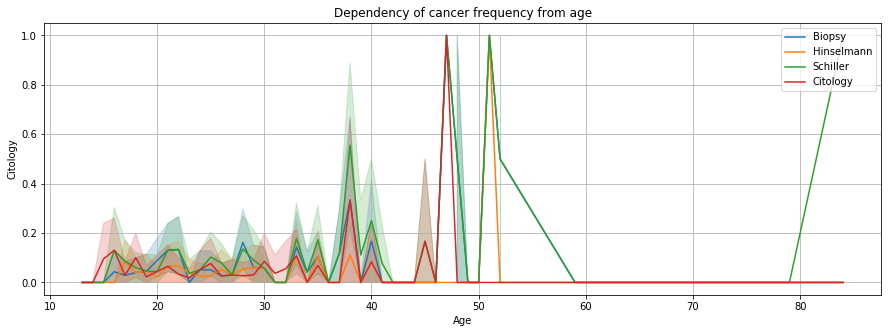

In [11]:
plt.figure(figsize=(15,5))
plt.grid()
plt.title("Dependency of cancer frequency from age")
sns.lineplot(x='Age', y='Biopsy', data=data)
sns.lineplot(x='Age', y='Hinselmann', data=data)
sns.lineplot(x='Age', y='Schiller', data=data)
sns.lineplot(x='Age', y='Citology', data=data)
plt.legend(["Biopsy", "Hinselmann","Schiller" , "Citology"], loc = 'upper right')


In [12]:
data.corr()['Biopsy']

Age                                   0.055956
Number of sexual partners            -0.008411
First sexual intercourse              0.004940
Num of pregnancies                    0.067649
Smokes                                0.029668
Smokes (years)                        0.060653
Smokes (packs/year)                   0.025133
Hormonal Contraceptives               0.017996
Hormonal Contraceptives (years)       0.064370
IUD                                   0.021130
IUD (years)                           0.008133
STDs                                  0.069058
STDs (number)                         0.012030
STDs:condylomatosis                   0.032808
STDs:vaginal condylomatosis          -0.070948
STDs:vulvo-perineal condylomatosis    0.034192
STDs:syphilis                        -0.079098
STDs:pelvic inflammatory disease     -0.069246
STDs:genital herpes                  -0.040743
STDs:molluscum contagiosum           -0.069246
STDs:HIV                              0.033282
STDs:Hepatiti

In [13]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [14]:
set(data['STDs (number)'])

{0.0, 1.0, 2.0, 3.0, 4.0}

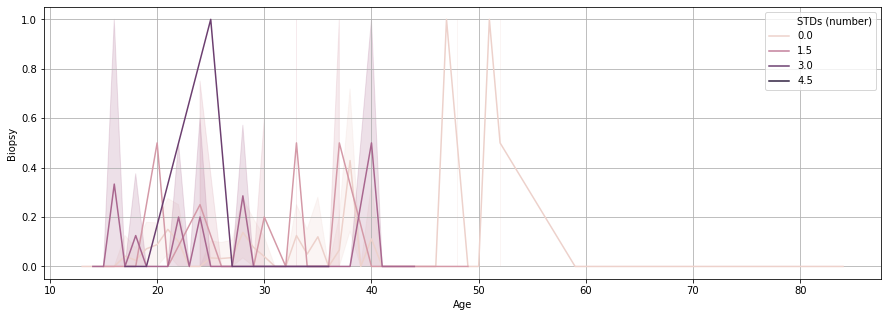

In [15]:
plt.figure(figsize=(15,5))
plt.grid()
sns.lineplot(x='Age', y='Biopsy', data=data, hue = data['STDs (number)'])

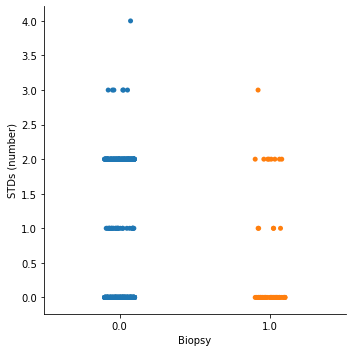

In [16]:
sns.catplot(x ='Biopsy' ,y='STDs (number)',data=data)

### Conclusions from EDA

 - cancer diagnosis as a target is really imbalanced, this can be concluded from catplot graphs (I used catplots for all 4 types of diagnostic procedures);
 - speaking about age, there is no significant peaks in terms of biopsy results, however there is a number of peaks around 40 years old. There are also several peaks (48-52 y.o.) but they are insignificant (as there are too few patients of that age with positive biopsy);
 - the majority of patients with positive biopsy results didn't have any STDs diagnosed, so the hypothesys of its importance wasn't proven.

# 3 Target variables choice and inspection

According to the article attached to the dataset, it is said that <b>biopsy</b> results are the most reliable types of diagnosis, so I'll predict this variable with my model. Let's now inspect, how imbalanced the target value:

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.linear_model import LassoCV, Lasso, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [18]:
from sklearn.metrics import make_scorer, f1_score
recall_scorer = make_scorer(recall_score)
f1_scorer = make_scorer(f1_score)
pr_scorer = make_scorer(precision_score)

In [84]:
X = data.drop(['Biopsy','Schiller','Hinselmann','Citology'],axis=1)
y = data.Biopsy.values 

In [85]:
print("Ratio of patients with positive biopsy results to all patients in the dataset:",y.sum()/len(y))

Ratio of patients with positive biopsy results to all patients in the dataset: 0.0641025641025641


Our dataset is severely imbalanced! That means that we should choose proper metrics to interpret the quality of our model. If we consider accuracy, then constant answer 0 will give us almost 94% accuracy score, so it is totally inappropriate.

I think the most appropriate metric here is recall score, as it will show us the ratio of detected patients to all patients, and I think that it is more important to maximize this ratio. The larger ratio is, the more patients we'll detect, so fewer people with positive diagnosis will live without any treatment and probably die.

In [61]:
pd.options.display.max_columns = 35
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5,9.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I decided to clear the data in order to get rid of duplicating of features. The idea is to get rid of linearly dependent features such as STDs numbers - this column is actually the sum of various columns specifying STDs (boolean). Also I dropped columns with >90% NaNs in the initial dataset.

In [93]:
X_clear = data.drop(['Smokes',
           'IUD',
           'STDs',
           'STDs (number)',
           'STDs: Time since first diagnosis',
           'STDs: Time since last diagnosis',
           'STDs: Number of diagnosis',
           'Biopsy',
           'Schiller',
           'Hinselmann',
           'Citology'],axis=1)

X_train_clear, X_test_clear, y_train_clear, y_test_clear = train_test_split(X_clear, y,
                                                    stratify=y, 
                                                    test_size=0.2)
scaler_clear = StandardScaler()
X_train_scaled_clear = scaler_clear.fit_transform(X_train_clear)
X_test_scaled_clear = scaler_clear.transform(X_test_clear)

In [94]:
log_regression = LogisticRegression(solver = 'lbfgs', C = 1)

print("Init model recall:", cross_val_score(log_regression,X_train_scaled_clear, y_train_clear,
                                            cv=StratifiedKFold(n_splits=5), 
                                            scoring = recall_scorer).mean())

print("Init model precision:", cross_val_score(log_regression,X_train_scaled_clear, y_train_clear,
                                               cv=StratifiedKFold(n_splits=5), 
                                               scoring = pr_scorer).mean())

Init model recall: 0.04444444444444444
Init model precision: 0.26666666666666666


/Users/egor/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


The model doesn't work well:( 

Let's apply PCA to data, then we'll augment it to balance classes and then we'll choose optimal model in terms of n_components. We'll use `cross_val_score` with 5 folds. After the best model is found (in terms of cross-val-score on TRAIN data), it will be evaluated on test data:

In [68]:
def find_best_model(X_train_scaled_clear, y_train):
    pr = []
    for comp in range(1,20):
        
        best_model = None
        best_score = 0
        best_comp = None
        best_decomp = None
        pca_decomp = PCA(comp)
        X_pca_train = pca_decomp.fit_transform(X_train_scaled_clear)
        #X_pca_test = pca_decomp.transform(X_test_scaled_clear)


        ill = X_pca_train[np.where(y_train == 1)]
        ill_len = len(ill)

        X_pca_extended = np.append(X_pca_train,ill,axis=0)
        y_pca_extended = np.append(y_train, np.ones(ill_len))

        for i in range(10):
            X_pca_extended = np.append(X_pca_extended,ill,axis=0)
            y_pca_extended = np.append(y_pca_extended, np.ones(ill_len))
        
        log_pca = LogisticRegression(solver = 'lbfgs')
        score = cross_val_score(log_pca, X_pca_extended, y_pca_extended,
                                         cv = 5, scoring = recall_scorer).mean()
        precision_score = cross_val_score(log_pca, X_pca_extended, y_pca_extended,
                                         cv = 5, scoring = pr_scorer).mean()
        pr.append([score, precision_score])
        
        print(comp)
        print('precision: ',precision_score)
        print('recall: ', score)
        print('f-score: ',cross_val_score(log_pca, X_pca_extended, y_pca_extended,
                                          cv = 5, scoring = f1_scorer).mean())
        
        if score > best_score:
            best_score = score
            log_pca.fit(X_pca_extended, y_pca_extended)
            best_model = log_pca
            best_decomp = pca_decomp
            
    return  best_score, best_model, best_decomp, X_pca_extended, y_pca_extended, pr

In [95]:
(score,  model, pca_decompositor, 
 X_train_pca_ext, y_train_pca_ext, pr) = find_best_model(X_train_scaled_clear, y_train_clear)

/Users/egor/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/egor/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/egor/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/egor/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/egor/anaconda3/lib/python3.7/site-packages/sklear

1
precision:  0.0
recall:  0.0
f-score:  0.0
2
precision:  0.7391458303223007
recall:  0.26323450134770887
f-score:  0.3875175342052251
3
precision:  0.7264835164835164
recall:  0.3086972147349506
f-score:  0.43254352448490996
4
precision:  0.6294197344620246
recall:  0.3295777178796046
f-score:  0.4324402424329106
5
precision:  0.6427995133278943
recall:  0.33904761904761904
f-score:  0.4435743997160694
6
precision:  0.6656871899169782
recall:  0.4620844564240791
f-score:  0.5451589219125809
7
precision:  0.7040823793587261
recall:  0.4829469901168014
f-score:  0.5719431186388425
8
precision:  0.6955942587340392
recall:  0.47534591194968556
f-score:  0.5637896437605839
9
precision:  0.7093939817239974
recall:  0.48481581311769995
f-score:  0.5750672096846609
10
precision:  0.6842702436452436
recall:  0.4696316262353998
f-score:  0.5564054232933608
11
precision:  0.7097452488756837
recall:  0.48483378256963167
f-score:  0.5755806057112878
12
precision:  0.7225120070988852
recall:  0.51

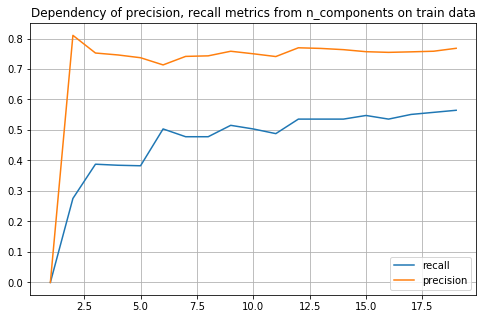

In [70]:
plt.figure(figsize = (8,5))
plt.title("Dependency of precision, recall metrics from n_components on train data")

plt.plot(range(1,20),np.array(pr).T[0])
plt.plot(range(1,20),np.array(pr).T[1])
plt.grid()
plt.legend(['recall','precision'], loc='lower right')

We choose here the best model in terms of number of components (recall metrics).Let's now implement gridsearchCV in order to find the best combination of hyperparams. 

**Note** I here don't use stratified KFold method as I artificially increased the share of smaller class.

**Let's** now iterate through gridsearch in order to find best Logistic regression model:

In [96]:
logistic_clf = LogisticRegression()
params = {"penalty": ["l1", "l2"],
         "C" : [10**i for i in range(-4,2)]}

scoring = {"Recall": recall_scorer,
           "Precision": pr_scorer}
gridsearch_log = GridSearchCV(logistic_clf,params,
                              n_jobs=-1, 
                              cv=KFold(n_splits=5),
                              scoring=scoring, 
                              refit = "Recall")

In [97]:
gridsearch_log.fit(X_train_pca_ext, y_train_pca_ext)

/Users/egor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit='Recall', return_train_score=False,
             scoring={'Precision': make_scorer(precision_score),
                     

In [98]:
recall_gs = [gridsearch_log.cv_results_['split'+str(i)+'_test_Recall'] for i in range(5)]
precision_gs = [gridsearch_log.cv_results_['split'+str(i)+'_test_Precision'] for i in range(5)]

recall_gs = np.array(recall_gs).T.mean(axis=1)
precision_gs = np.array(precision_gs).T.mean(axis=1)

Text(0, 0.5, 'precision')

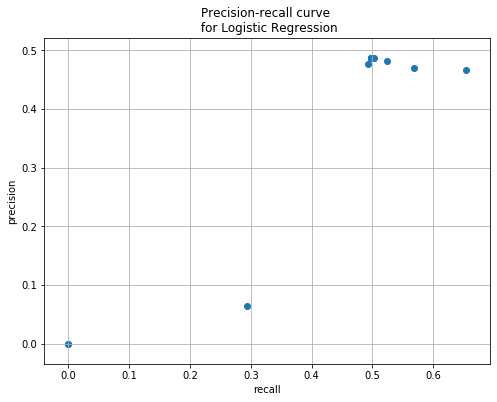

In [99]:
plt.figure(figsize = (8,6))
plt.scatter(recall_gs, precision_gs)
plt.grid()
plt.title("Precision-recall curve \n for Logistic Regression")
plt.xlabel("recall")
plt.ylabel("precision")

In [100]:
gridsearch_log.best_score_

0.6541697191697192

In [106]:
best_log_clf = LogisticRegression(C = gridsearch_log.best_params_['C'], 
                                  penalty = gridsearch_log.best_params_['penalty'],
                                  solver = 'lbfgs')
best_log_clf.fit(X_train_pca_ext, y_train_pca_ext)

print("Best logistic regression recall on test:",recall_score(y_test_clear, 
                   best_log_clf.predict(pca_decompositor.transform(X_test_scaled_clear))))
print("Best logistic regression precision on test:",precision_score(y_test_clear, 
                   best_log_clf.predict(pca_decompositor.transform(X_test_scaled_clear))))

Best logistic regression recall on test: 0.0
Best logistic regression precision on test: 0.0


/Users/egor/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Now let's try to achieve better quality using XGBClassifier:

In [79]:
import xgboost as xgb

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [87]:
boost_clf = xgb.XGBClassifier()

In [88]:
boost_clf.fit(X_train.values, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [89]:
cross_val_score(boost_clf,X_train, y_train,cv = StratifiedKFold(5), scoring=recall_scorer).mean()

0.0

Standard XGBoost classifier classfies all data as 0, so the score is 0 therefore. Let's try to augment our training data:

In [90]:
ill = X_train.values[np.where(y_train == 1)]
ill_len = len(ill)

X_train_ext = np.append(X_train,ill,axis=0)
y_train_ext = np.append(y_train, np.ones(ill_len))

for i in range(10):
    X_train_ext = np.append(X_train_ext,ill,axis=0)
    y_train_ext = np.append(y_train_ext, np.ones(ill_len))
assert(y_train_ext.shape[0] == X_train_ext.shape[0])

In [91]:
cross_val_score(boost_clf,X_train_ext, y_train_ext,cv = 5, scoring=recall_scorer).mean()

0.9091464510332434

Simple data augmentation raised our score in terms of recall.

Let's now finetune the hyperparameters with gridsearchCV and try to increase our recall metrics.

In [92]:
param_grid = {"learning_rate": [10**i for i in range(-3,1)],
              "max_depth": [i for i in range(1,10)],
              "n_estimators": [10,30,50,80,100,120,150],
              "min_child_weight": [i for i in range(1,4)]}
gridsearch = GridSearchCV(boost_clf, param_grid, n_jobs=-1, cv=KFold(n_splits=5), scoring=scoring, refit="Recall")

In [109]:
gridsearch.fit(X_train_ext, y_train_ext)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='b...
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [10, 30, 50, 80, 100, 120, 150]},
             pre_

In [110]:
recall_gs_xgb = [gridsearch.cv_results_['split'+str(i)+'_test_Recall'] for i in range(5)]
precision_gs_xgb = [gridsearch.cv_results_['split'+str(i)+'_test_Precision'] for i in range(5)]

recall_gs_xgb = np.array(recall_gs_xgb).T.mean(axis=1)
precision_gs_xgb = np.array(precision_gs_xgb).T.mean(axis=1)

Text(0, 0.5, 'precision')

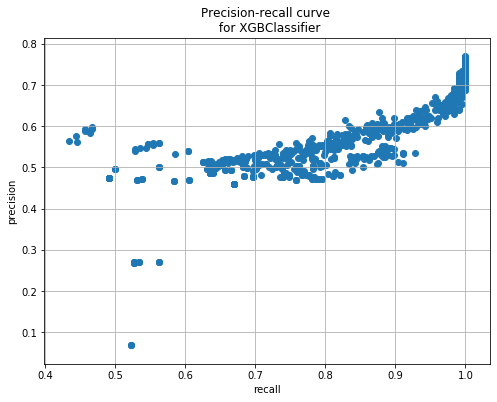

In [111]:
plt.figure(figsize = (8,6))
plt.scatter(recall_gs_xgb, precision_gs_xgb)
plt.grid()
plt.title("Precision-recall curve \n for XGBClassifier")
plt.xlabel("recall")
plt.ylabel("precision")

In [112]:
gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 150}

Now let's evaluate our best model:

In [113]:
xgb_model_best = xgb.XGBClassifier(learning_rate=gridsearch.best_params_['learning_rate'],
                                   max_depth=gridsearch.best_params_['max_depth'], 
                                   min_child_weight=gridsearch.best_params_['min_child_weight'], 
                                   n_estimators=gridsearch.best_params_['n_estimators'])
xgb_model_best.fit(X_train_ext, y_train_ext)
print("Recall:",recall_score(y_test, xgb_model_best.predict(X_test.values)))
print("Precision:",precision_score(y_test, xgb_model_best.predict(X_test.values)))

Recall: 0.09090909090909091
Precision: 0.125


Now let's look at the dependency between max_depth and recall metrics values:

In [114]:
param_grid2 = {"max_depth": [i for i in range(1,20)]}
gridsearch2 = GridSearchCV(boost_clf, param_grid2, n_jobs=-1, cv=KFold(n_splits=5), scoring=recall_scorer)

In [115]:
gridsearch2.fit(X_train_ext, y_train_ext)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                            

In [116]:
gridsearch2.best_params_

{'max_depth': 8}

In [117]:
scores = np.array([gridsearch2.cv_results_['split0_test_score'],
    gridsearch2.cv_results_['split1_test_score'],
    gridsearch2.cv_results_['split2_test_score'],
    gridsearch2.cv_results_['split3_test_score'],
    gridsearch2.cv_results_['split4_test_score']])

Text(0, 0.5, 'recall value')

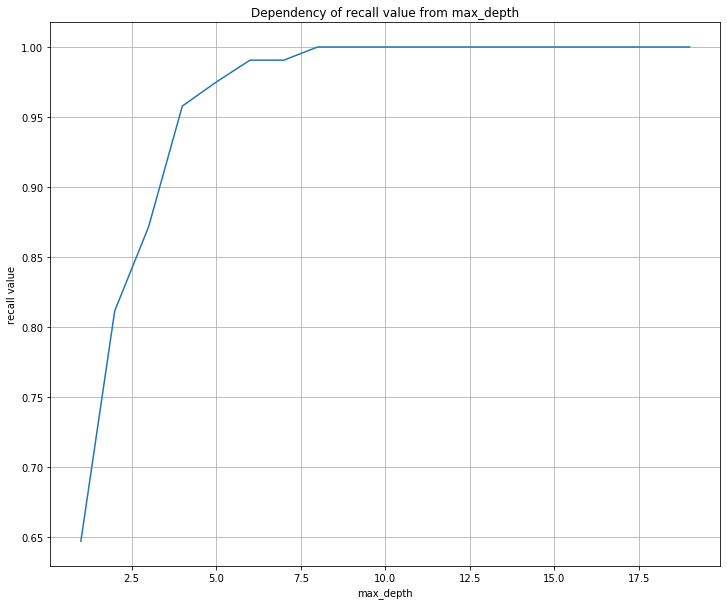

In [118]:
plt.figure(figsize=(12,10))
plt.plot(range(1,20),np.mean(scores,axis=0))
plt.grid()
plt.title("Dependency of recall value from max_depth")
plt.xlabel("max_depth")
plt.ylabel("recall value")

## Conclusion

I chose recall metric as the most important one, as it doen't allow to miss those patients who are really ill. However the specialists may disagree with me. So, in terms of recall, the best model is Logistic regression trained on PCA decomposed data and then augmented. 

The data fed to XGBClassifier is original data without any scaling or dropping of any features.

According to Precision-Recall curve XGBClassifier seems to work better.

# 4 Final report

Now let's recap once again what was done from the very beginning:
<ol>
        <li> Data loading
          <ul>
              <li>explore features;</li>
          </ul>
        <li> Exploratory data analysis
            <ul>
                 <li>fill NaN values with median values;
                 <li>drop degenerate columns (columns containing only 1 unique value);
                 <li>formulate hypotheses for visual check:
                    <ol>
                         <li>cancer depends on age;
                         <li>cancer depends on number of STDs;
                         <li>item target values are severely imbalanced;
                    </ol>
                 <li>plot graphs and check the hypotheses: first two were rejected (dependency from age was present but non-linear), the third was proven
               </ul>
        <li> Models training
             <ol> 
                 <li> Select the proper metric - <b>recall</b>;
                 <li>Preparing and training linear model (logistic regression)
                     <ul>
                         <li> drop "bad" features (duplicated boolean features and those with high ratio of missing values);
                         <li> apply StandardScaler to X data;
                         <li> train base logistic regression model and evaluate it;
                         <li> apply PCA to X, augment the data, plot score graph from n_PC, choose optimal number of PCs;
                         <li> build a GridSearchCV object and find the best model in terms of recall;
                         <li> evaluate model with best parameters on test data;
                         <li> plot precision-recall curve;
                     </ul>
                 <li> Preparing and training non-linear model (gradient boosting over decision trees)
                     <ul>
                         <li> train default XGBClassifier model and evaluate it;
                         <li> augment train data;
                         <li> build a GridSearchCV object and find the best model in terms of recall;
                         <li> evaluate model with best parameters on test data;
                         <li> plot precision-recall curve;
                     </ul>
                  <li> Compare the models
             </ol>
</ol>
 
 